In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
url = 'https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv'

In [3]:
df = pd.read_csv(url)
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [4]:
df.shape

(158, 12)

Here data is having 158 rows × 12 columns.

Country, Region is categorical data, Happiness Rank is ordinal and other data are continuous in nature.

Happiness Score is dependent(target) variable and other are independent(input variable).

In [5]:
# Let replace the positions of columns

df = df.iloc[:,[2,0,1,5,6,7,8,9,10,11,4,3]]
df.head()

,Happiness Rank,Country,Region,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Standard Error,Happiness Score
0,1,Switzerland,Western Europe,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,0.03411,7.587
1,2,Iceland,Western Europe,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,0.04884,7.561
2,3,Denmark,Western Europe,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,0.03328,7.527
3,4,Norway,Western Europe,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,0.03880,7.522
4,5,Canada,North America,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,0.03553,7.427


In [6]:
df.columns

Index(['Happiness Rank', 'Country', 'Region', 'Economy (GDP per Capita)',
       'Family', 'Health (Life Expectancy)', 'Freedom',
       'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual',
       'Standard Error', 'Happiness Score'],
      dtype='object')

In [7]:
df.dtypes

Happiness Rank                     int64
Country                           object
Region                            object
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
Standard Error                   float64
Happiness Score                  float64
dtype: object

All columns are having numerical data (int, float) except 'country','Region'

In [8]:
df.isnull().sum()

Happiness Rank                   0
Country                          0
Region                           0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
Standard Error                   0
Happiness Score                  0
dtype: int64

Given dataset has no null value

In [9]:
df.nunique()

Happiness Rank                   157
Country                          158
Region                            10
Economy (GDP per Capita)         158
Family                           158
Health (Life Expectancy)         157
Freedom                          158
Trust (Government Corruption)    157
Generosity                       158
Dystopia Residual                158
Standard Error                   153
Happiness Score                  157
dtype: int64

All columns are having different different values means all columns are having continuous variables, except Region column. Region column is having discrete variables.

In [10]:
print('Percentage of cardinality in Region column')
print(df['Region'].value_counts()/df['Region'].value_counts().sum()*100)

Percentage of cardinality in Region column
Sub-Saharan Africa                 25.316456
Central and Eastern Europe         18.354430
Latin America and Caribbean        13.924051
Western Europe                     13.291139
Middle East and Northern Africa    12.658228
Southeastern Asia                   5.696203
Southern Asia                       4.430380
Eastern Asia                        3.797468
Australia and New Zealand           1.265823
North America                       1.265823
Name: Region, dtype: float64


'Sub-Saharan Africa' and 'Central and Eastern Europe' are occuring mostly and Australia and New Zealand and North America are occuring rarely

# EDA

# Scatter Plot

In [11]:
df.describe()

,Happiness Rank,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Standard Error,Happiness Score
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977,0.047885,5.375734
std,45.754363,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550,0.017146,1.145010
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580,0.018480,2.839000
25%,40.250000,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410,0.037268,4.526000
50%,79.500000,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415,0.043940,5.232500
75%,118.750000,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415,0.052300,6.243750
max,158.000000,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140,0.136930,7.587000


All columns are having 158 values and there is no missing values. And as we can see mean and meadian for each columns are very close it means data is symmetrically or normally distributed. Each column has variance close to zero except for Happiness rank and Happiness score column.

In [12]:
df.skew()

Happiness Rank                   0.000418
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
Standard Error                   1.983439
Happiness Score                  0.097769
dtype: float64

Standard Error,Family,Health (Life Expectancy),Trust (Government Corruption),Generosity columns are having more skewness which need to remove.

<AxesSubplot:xlabel='Economy (GDP per Capita)', ylabel='Happiness Score'>

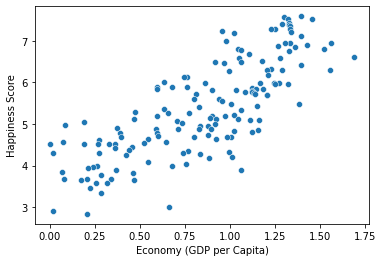

In [13]:
sns.scatterplot(x='Economy (GDP per Capita)',y='Happiness Score',data=df)

<AxesSubplot:xlabel='Family', ylabel='Happiness Score'>

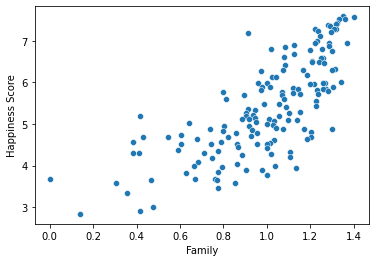

In [14]:
sns.scatterplot(x='Family',y='Happiness Score',data=df)

<AxesSubplot:xlabel='Health (Life Expectancy)', ylabel='Happiness Score'>

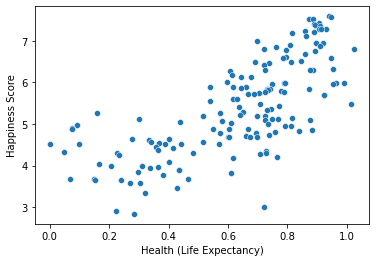

In [15]:
sns.scatterplot(x='Health (Life Expectancy)',y='Happiness Score',data=df)

<AxesSubplot:xlabel='Freedom', ylabel='Happiness Score'>

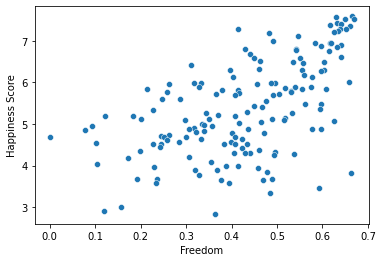

In [16]:
sns.scatterplot(x='Freedom',y='Happiness Score',data=df)

<AxesSubplot:xlabel='Trust (Government Corruption)', ylabel='Happiness Score'>

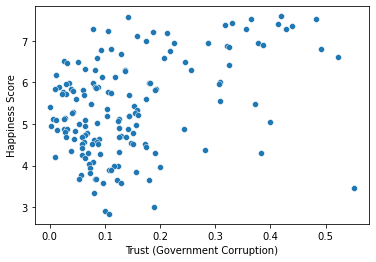

In [17]:
sns.scatterplot(x='Trust (Government Corruption)',y='Happiness Score',data=df)

<AxesSubplot:xlabel='Dystopia Residual', ylabel='Happiness Score'>

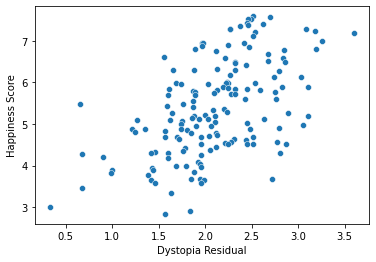

In [18]:
sns.scatterplot(x='Dystopia Residual',y='Happiness Score',data=df)

<AxesSubplot:xlabel='Standard Error', ylabel='Happiness Score'>

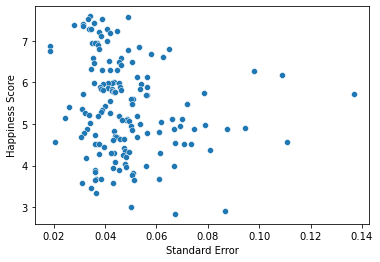

In [19]:
sns.scatterplot(x='Standard Error',y='Happiness Score',data=df)

<AxesSubplot:xlabel='Generosity', ylabel='Happiness Score'>

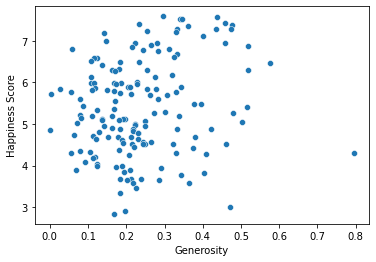

In [20]:
sns.scatterplot(x='Generosity',y='Happiness Score',data=df)

In [21]:
df.head(3)

,Happiness Rank,Country,Region,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Standard Error,Happiness Score
0,1,Switzerland,Western Europe,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,0.03411,7.587
1,2,Iceland,Western Europe,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,0.04884,7.561
2,3,Denmark,Western Europe,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,0.03328,7.527


In [22]:
numeric_features = [ 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual','Standard Error','Happiness Score']

print(len(numeric_features))

9


Here we segregate columns having numerical values to plot various graphs

Lets plot the box plot to check the ouliers

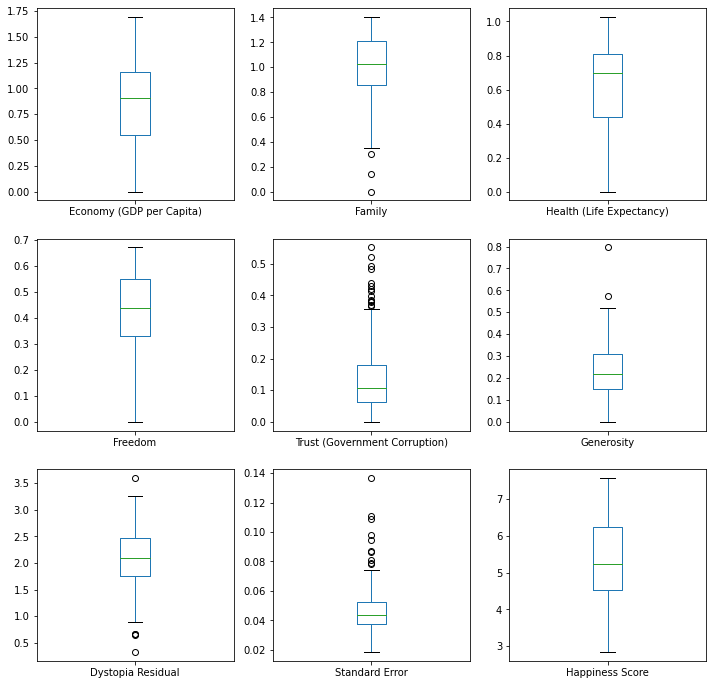

In [23]:
fig,ax = plt.subplots(3,3,figsize=(12,12))
row=col = 0

for n,i in enumerate(numeric_features):
    if (n%3 ==0)& (n>0):
        row = row+1
        col = 0
    df[i].plot(kind ='box', ax= ax[row,col])
    col = col+1
    

 From above boxplots we can conclude that there are outliers in Standard Error and Trust (Government Corruption) feature whereas very few in Generosity and Dystopia Residual features

Lets draw the histogram to check the skewnes in the graphs

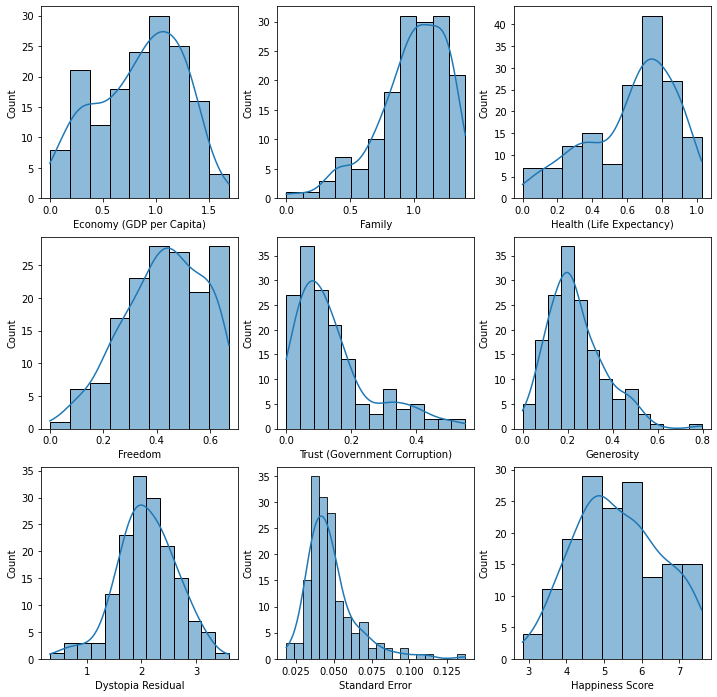

In [24]:
fig,ax = plt.subplots(3,3,figsize=(12,12))
row = col = 0
for n,i in enumerate(numeric_features):
    if (n%3 == 0) & (n > 0):
        row += 1
        col = 0
    sns.histplot(df[i],kde=True,ax=ax[row,col])
    col += 1

From above histograms we can conclude that Dytopia Residual feature is normally distributed and all other a little bit right skewed or left skewed

<AxesSubplot:xlabel='Generosity', ylabel='Happiness Score'>

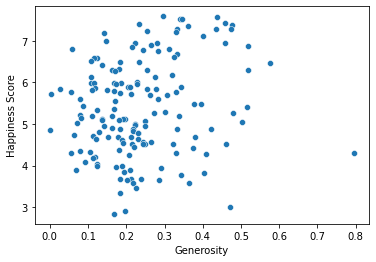

In [25]:
sns.scatterplot(x='Generosity',y='Happiness Score',data=df)

by the graph we can see that there is no relationship between the Generosity and Happiness score

<AxesSubplot:xlabel='Economy (GDP per Capita)', ylabel='Happiness Score'>

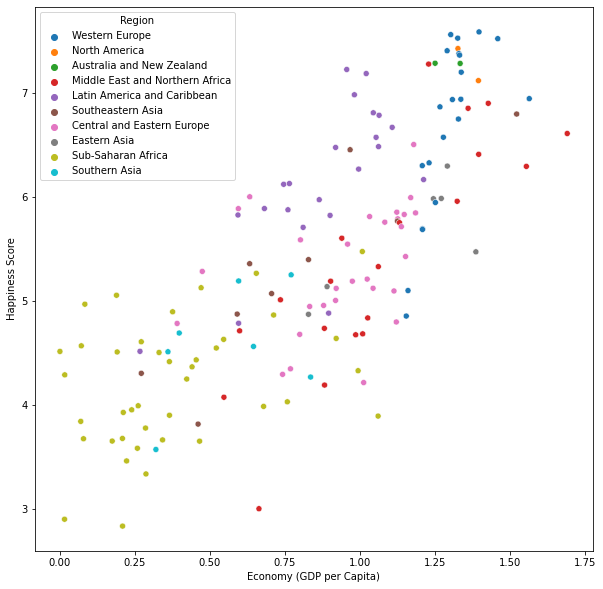

In [26]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='Economy (GDP per Capita)',y='Happiness Score',data=df, hue='Region')

By the above scatterplot we can see that there is a positive correlation between Economy (GDP per Capita) and Happiness score. That mean Happiness score of any country will increase if their Economy (GDP per Capita) will increase.

<Figure size 720x720 with 0 Axes>

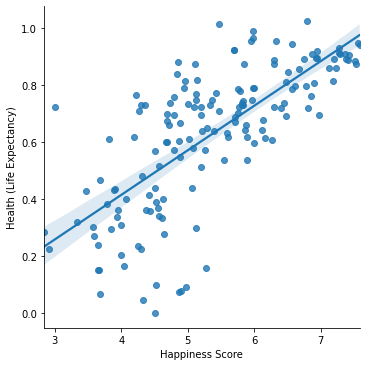

In [27]:
plt.figure(figsize = (10,10))
sns.lmplot(x='Happiness Score', y= 'Health (Life Expectancy)', data=df)

 There is also a positive relation between the health of the people and the happiness score 

# Multivariate Analysis

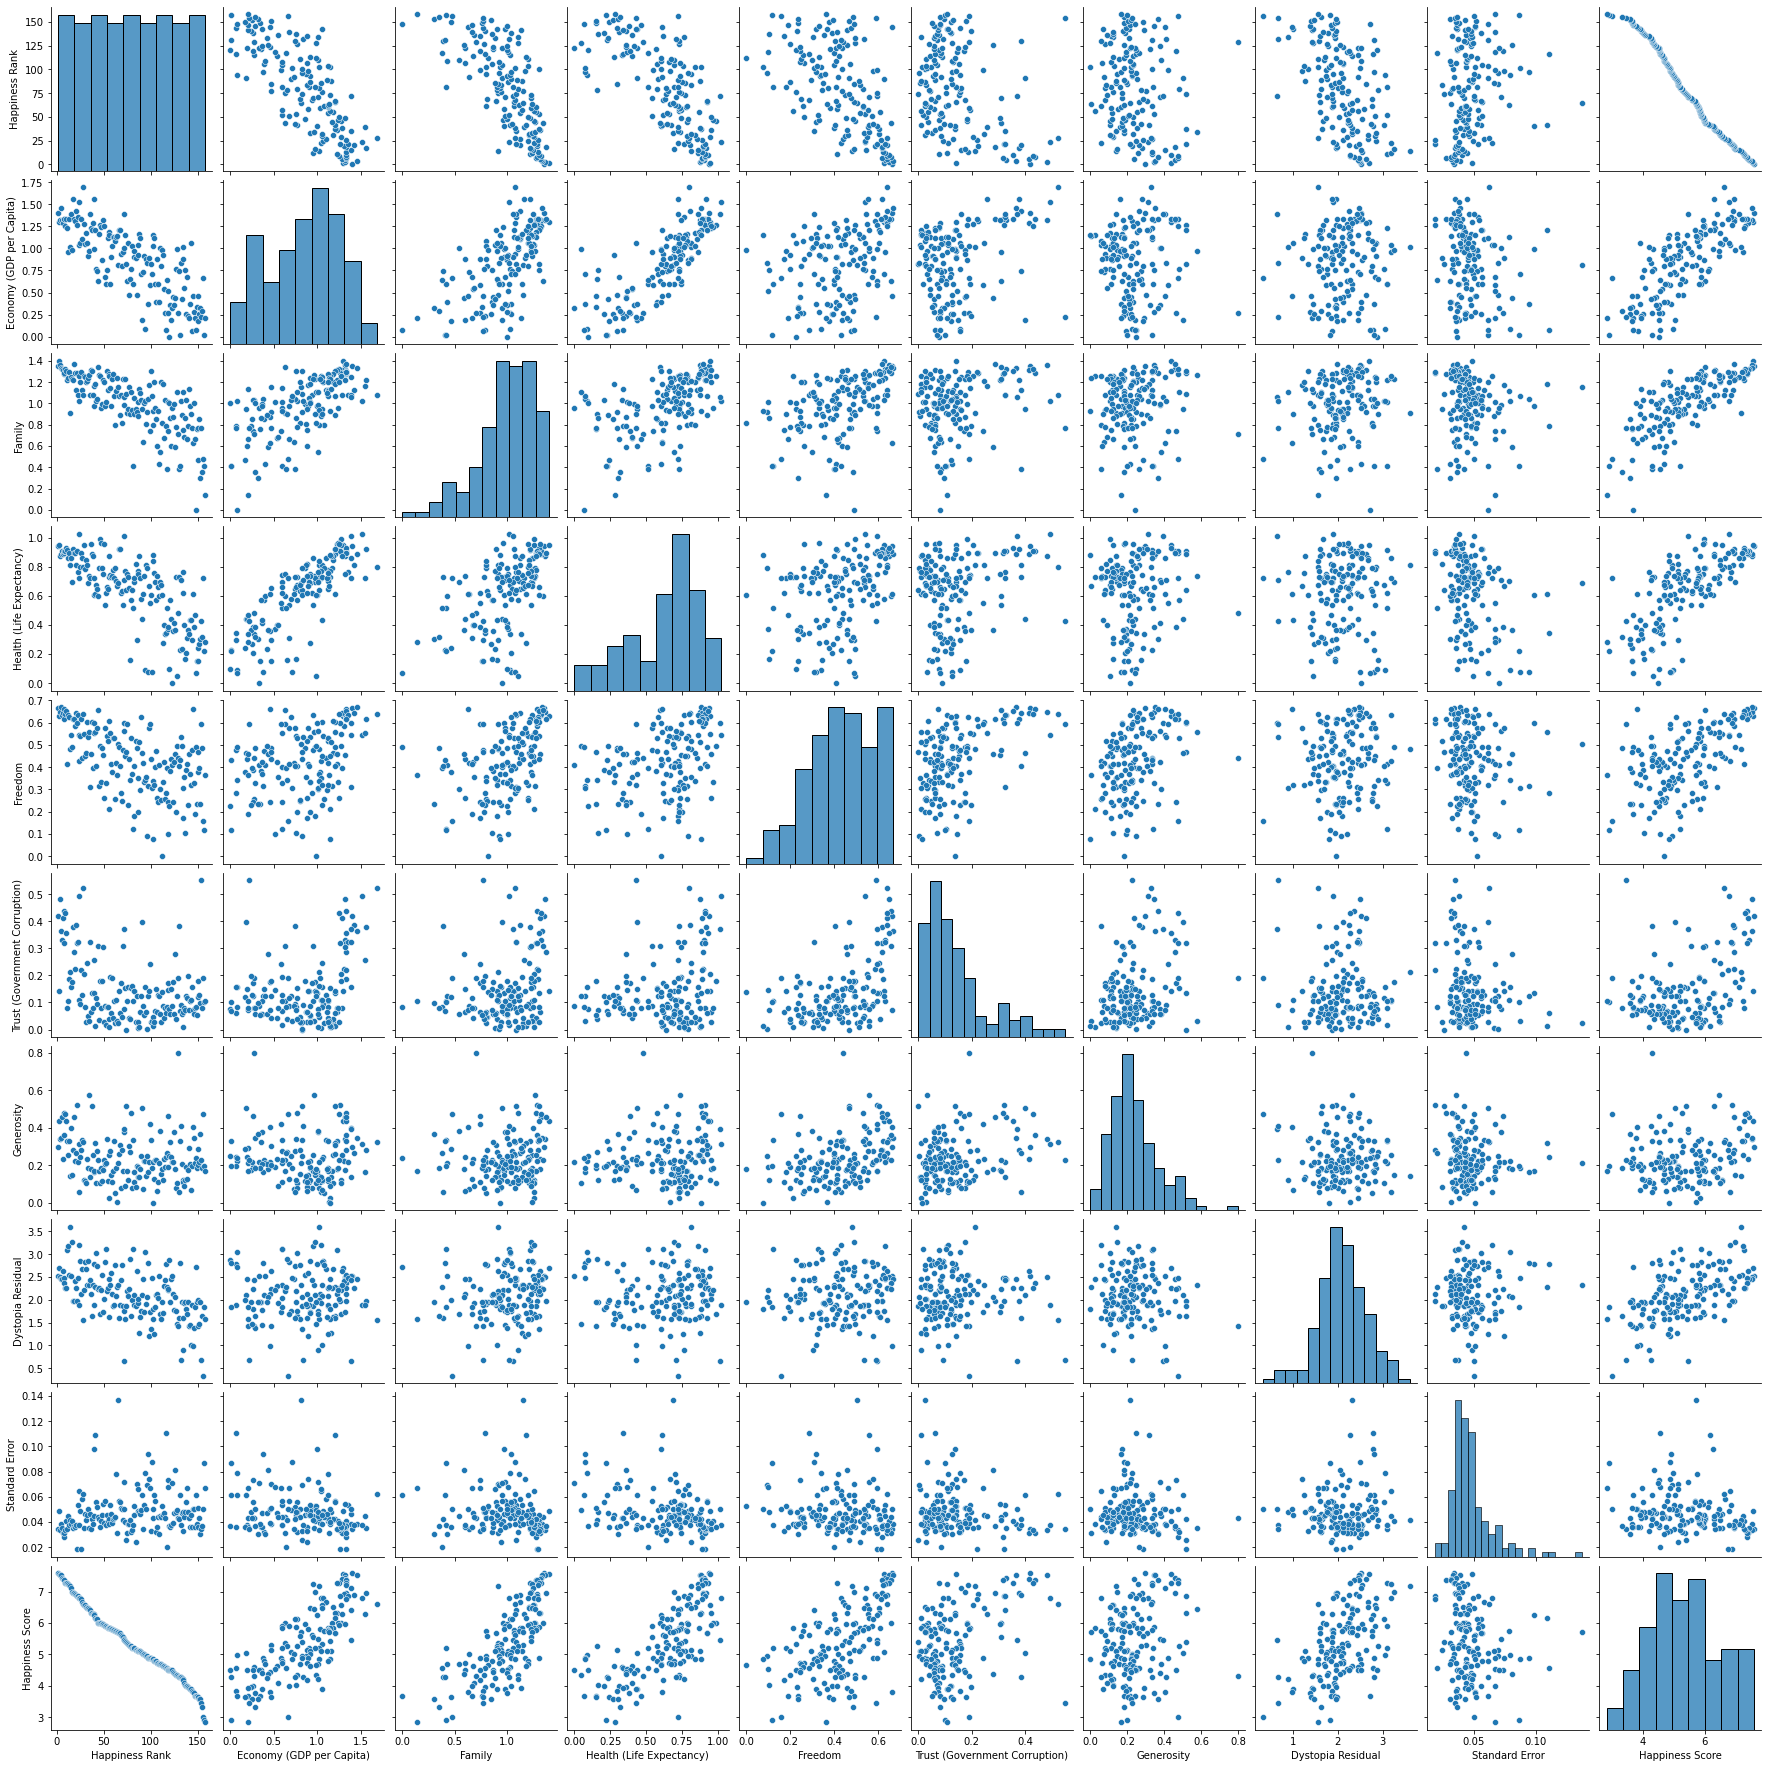

In [28]:
sns.pairplot(df)

# correlation

In [29]:
df.corr()

,Happiness Rank,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Standard Error,Happiness Score
Happiness Rank,1.000000,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999,0.158516,-0.992105
Economy (GDP per Capita),-0.785267,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059,-0.217651,0.780966
Family,-0.733644,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117,-0.120728,0.740605
Health (Life Expectancy),-0.735613,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979,-0.310287,0.724200
Freedom,-0.556886,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783,-0.129773,0.568211
Trust (Government Corruption),-0.372315,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105,-0.178325,0.395199
Generosity,-0.160142,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301,-0.088439,0.180319
Dystopia Residual,-0.521999,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000,0.083981,0.530474
Standard Error,0.158516,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981,1.000000,-0.177254
Happiness Score,-0.992105,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474,-0.177254,1.000000


<AxesSubplot:>

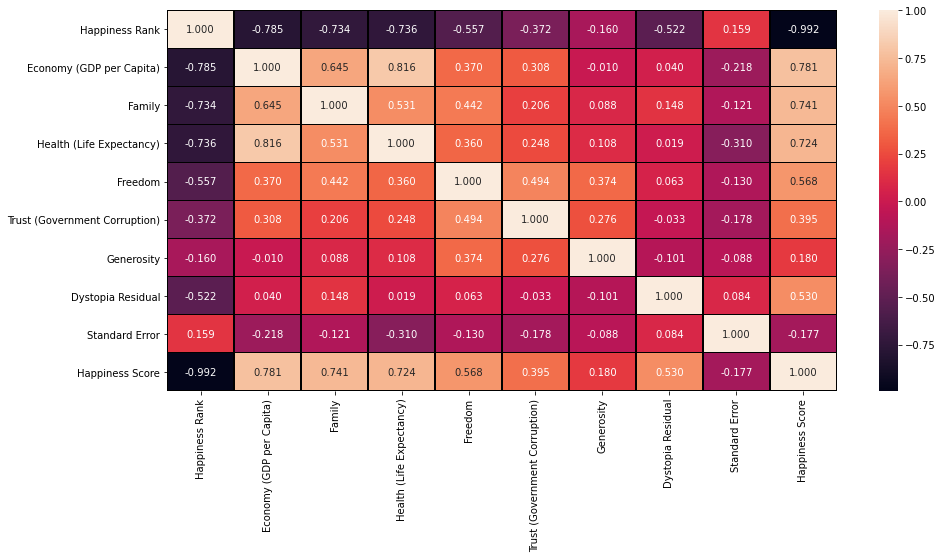

In [30]:
plt.figure(figsize = (15,7))
sns.heatmap(df.corr(),annot = True,linewidth=0.5, linecolor ='black', fmt = '.3f')

Happiness Score show a strong correlation between Economy,Family,Health and Dystopia while a negative correlation with Happiness Rank , hence we can drop the Happiness rank column and country as well

In [31]:
df.head(3)

,Happiness Rank,Country,Region,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Standard Error,Happiness Score
0,1,Switzerland,Western Europe,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,0.03411,7.587
1,2,Iceland,Western Europe,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,0.04884,7.561
2,3,Denmark,Western Europe,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,0.03328,7.527


In [32]:
df.shape

(158, 12)

In [33]:
df.drop(['Happiness Rank','Country'], axis=1, inplace =True)
df.head(3)

,Region,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Standard Error,Happiness Score
0,Western Europe,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,0.03411,7.587
1,Western Europe,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,0.04884,7.561
2,Western Europe,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,0.03328,7.527


In [34]:
df.shape

(158, 10)

Lets convert the Region column from objective to int

In [35]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [36]:
df['Region'] = le.fit_transform(df['Region'])

df.head()

,Region,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Standard Error,Happiness Score
0,9,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,0.03411,7.587
1,9,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,0.04884,7.561
2,9,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,0.03328,7.527
3,9,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,0.03880,7.522
4,5,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,0.03553,7.427


Now lets remove the outliers by using the Z-score

In [37]:
from scipy.stats import zscore

z= np.abs(zscore(df))
df = df[(z<3).all(axis=1)]

Lets check again the outliers using boxplot

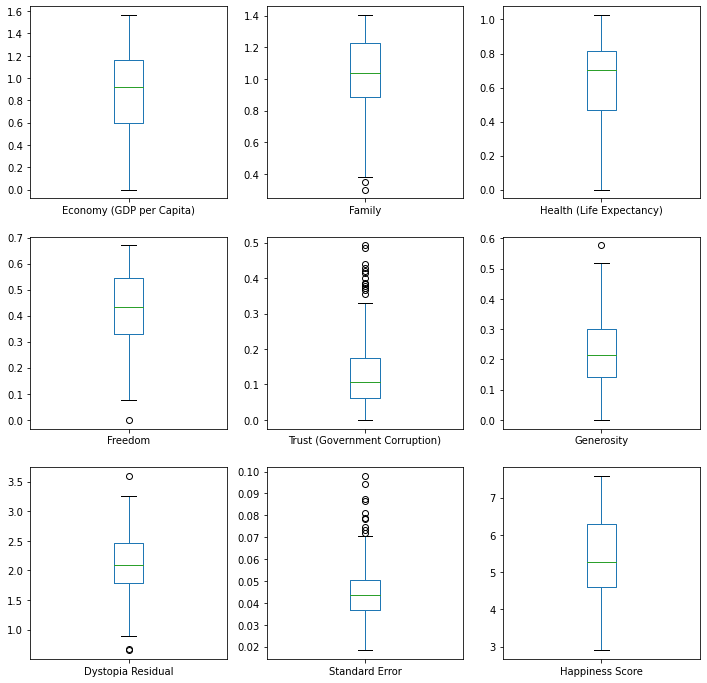

In [38]:
fig,ax = plt.subplots(3,3,figsize = (12,12))
row = col= 0

for n,i in enumerate(numeric_features):
    if (n%3==0) & (n>0):
        row = row+1
        col = 0
    df[i].plot(kind ='box',ax=ax[row,col])
    
    col = col+1

Still some outliers are there

In [39]:
# lets check the skewnes

df.skew()

Region                          -0.096985
Economy (GDP per Capita)        -0.390657
Family                          -0.811340
Health (Life Expectancy)        -0.747711
Freedom                         -0.400867
Trust (Government Corruption)    1.272530
Generosity                       0.654710
Dystopia Residual               -0.021144
Standard Error                   1.243048
Happiness Score                  0.169740
dtype: float64

As we can se still some columns are having skewness

In [40]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer()
dfpt = pt.fit_transform(df)
df = pd.DataFrame(dfpt,columns = df.columns)


In [41]:
df.skew()

Region                          -0.222589
Economy (GDP per Capita)        -0.140644
Family                          -0.148528
Health (Life Expectancy)        -0.190663
Freedom                         -0.076489
Trust (Government Corruption)    0.174593
Generosity                       0.025172
Dystopia Residual                0.014748
Standard Error                  -0.031216
Happiness Score                 -0.017940
dtype: float64

NOw all the columns are having skewness between +0.5 to -0.5

 Now saperating the training data (independent) and target data (dependent features)

In [42]:
df.head(3)

,Region,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Standard Error,Happiness Score
0,1.234514,1.492454,1.658880,1.469636,1.754982,1.817625,0.659579,0.755255,-0.950337,1.825912
1,1.234514,1.194067,2.009125,1.511292,1.442182,0.329676,1.562604,1.111168,0.378562,1.806250
2,1.234514,1.266612,1.730785,1.053469,1.616037,1.953400,0.977226,0.706495,-1.041401,1.780485


In [43]:
df.shape

(149, 10)

In [44]:
x =df.iloc[:,:-1]
y=df.iloc[:,-1]

In [45]:
x.shape, y.shape

((149, 9), (149,))

Lets scale the data using MinMax scaling to improve the accuracy

In [46]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()

In [47]:
xnew = mms.fit_transform(x)



In [48]:
x = pd.DataFrame(xnew, columns = x.columns)
x.head()

,Region,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Standard Error
0,1.000000,0.862295,0.914502,0.858145,0.991316,0.961753,0.669075,0.625344,0.380243
1,1.000000,0.787868,1.000000,0.868527,0.915949,0.585246,0.856886,0.688668,0.621320
2,1.000000,0.805963,0.932054,0.754423,0.957838,0.996109,0.735139,0.616669,0.363723
3,1.000000,0.912891,0.885542,0.770304,1.000000,0.922971,0.742999,0.607522,0.467178
4,0.623159,0.806598,0.872719,0.801548,0.924420,0.891819,0.881749,0.602887,0.407692


Now the data is scaled completely and all the values lie between 0-1 range, now we can perform the regression and testing

In [49]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor


In [50]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [51]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y, random_state=45, test_size =.25)

In [52]:
Rg_model =[KNeighborsRegressor(),SVR(),DecisionTreeRegressor(),LinearRegression(),Lasso(),Ridge(),RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor()]

In [53]:
maelist = []
mselist = []
rmselist= []
r2list = []

def create_model(model):
    m=model
    m.fit(xtrain,ytrain)
    p = m.predict(xtest)
    
    
    mae = mean_absolute_error(p,ytest)
    mse = mean_squared_error(p,ytest)
    rmse = np.sqrt(mean_squared_error(p,ytest))
    r2 = r2_score(ytest,p)
    
    maelist.append(mae)
    mselist.append(mse)
    rmselist.append(rmse)
    r2list.append(r2)
    
    
    
    print(m)
    print('mean absolute error',mae)
    print('mean squared error',mse)
    print('root mean squared error',rmse)
    print('r2 score',r2)
    print('--------------------------------------------------------------------------------------------------------------------------------')

In [54]:
for i in Rg_model:
    create_model(i)

KNeighborsRegressor()
mean absolute error 0.3337011387387764
mean squared error 0.17923990581911498
root mean squared error 0.4233673414649682
r2 score 0.8406330187835505
--------------------------------------------------------------------------------------------------------------------------------
SVR()
mean absolute error 0.14235201049412513
mean squared error 0.04319228513415639
root mean squared error 0.2078275369968003
r2 score 0.9615965871985157
--------------------------------------------------------------------------------------------------------------------------------
DecisionTreeRegressor()
mean absolute error 0.35927378064764237
mean squared error 0.25530482478299027
root mean squared error 0.5052769782831891
r2 score 0.7730016704164063
--------------------------------------------------------------------------------------------------------------------------------
LinearRegression()
mean absolute error 0.072334119615316
mean squared error 0.009546827924925843
root mean squar

As we can see by the above output Linear Regression model gives the best output, so we can say Linear Regression is the best model

In [55]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y, random_state=45, test_size =.25)

In [56]:
m = LinearRegression()
m.fit(xtrain,ytrain)

mpred = m.predict(xtest)

print(' mean absolute error :',mean_absolute_error(mpred,ytest))
print('mean squared error :', mean_squared_error(mpred,ytest))
print ('root mean square error :', np.sqrt(mean_squared_error(mpred,ytest)))
print ('r2 score :',r2_score(ytest,mpred))

 mean absolute error : 0.072334119615316
mean squared error : 0.009546827924925843
root mean square error : 0.0977078703325676
r2 score : 0.9915116606447911


# Saving the best model

In [57]:
m = LinearRegression()
m.fit(x,y)

LinearRegression()

In [60]:
import pickle
filename='Happiness_model.pkl'
pickle.dump(m,open(filename,'wb'))

In [62]:
df.head()

,Region,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Standard Error,Happiness Score
0,1.234514,1.492454,1.658880,1.469636,1.754982,1.817625,0.659579,0.755255,-0.950337,1.825912
1,1.234514,1.194067,2.009125,1.511292,1.442182,0.329676,1.562604,1.111168,0.378562,1.806250
2,1.234514,1.266612,1.730785,1.053469,1.616037,1.953400,0.977226,0.706495,-1.041401,1.780485
3,1.234514,1.695302,1.540248,1.117188,1.791023,1.664359,1.015018,0.655082,-0.471124,1.776690
4,0.055028,1.269159,1.487718,1.242549,1.477337,1.541247,1.682150,0.629030,-0.799032,1.704342


In [61]:
import numpy as np
a=np.array(ytest)
predicted= np.array(m.predict(xtest))
df_com= pd.DataFrame({'original':a, 'predicted':predicted}, index= range(len(a)))
df_com

,original,predicted
0,1.825912,1.913839
1,0.541283,0.675313
2,-1.107316,-1.025712
3,1.776690,1.872762
4,0.829745,0.880504
5,0.538715,0.615619
6,0.779736,0.746398
7,-0.774665,-0.849769
8,-0.973567,-0.945172
9,-1.524493,-1.435069
